In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

In [2]:
#obtain the dataset from the url below
#the dataset is in csv format
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_base.csv"
df = pd.read_csv(url, header=None)

In [3]:
#add headers to the dataframe
header = ["Manufacturer", "Category", "Screen", "GPU", "OS", "CPU_core", "Screen_Size_cm", "CPU_frequency", "RAM_GB", "Storage_GB_SSD", "Weight_kg", "Price"]
df.columns = header
df.head(10)

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
5,Dell,3,Full HD,1,1,5,39.624,1.6,8,256,2.2,1016
6,HP,3,Full HD,3,1,5,39.624,1.6,8,256,2.1,1117
7,Acer,3,IPS Panel,2,1,5,38.1,1.6,4,256,2.2,866
8,Dell,3,Full HD,1,1,5,39.624,2.5,4,256,2.3,812
9,Acer,3,IPS Panel,3,1,7,38.1,1.8,8,256,2.2,1068


##**Identify missing values**
###**Convert "?" to NaN**
In the car data set, missing data comes with the question mark "?". We replace "?" with NaN (Not a Number), Python's default missing value marker for reasons of computational speed and convenience.

In [4]:
#replace ? symbol with NaN value so that dropna() can remove missing values
df.replace('?', np.nan, inplace=True)
df.head(10)

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
5,Dell,3,Full HD,1,1,5,39.624,1.6,8,256,2.2,1016
6,HP,3,Full HD,3,1,5,39.624,1.6,8,256,2.1,1117
7,Acer,3,IPS Panel,2,1,5,38.1,1.6,4,256,2.2,866
8,Dell,3,Full HD,1,1,5,39.624,2.5,4,256,2.3,812
9,Acer,3,IPS Panel,3,1,7,38.1,1.8,8,256,2.2,1068


In [5]:
#check the data for missing values
missing_data = df.isnull()
for col in missing_data.columns:
  print(missing_data[col].value_counts())
  print(" ")

Manufacturer
False    238
Name: count, dtype: int64
 
Category
False    238
Name: count, dtype: int64
 
Screen
False    238
Name: count, dtype: int64
 
GPU
False    238
Name: count, dtype: int64
 
OS
False    238
Name: count, dtype: int64
 
CPU_core
False    238
Name: count, dtype: int64
 
Screen_Size_cm
False    234
True       4
Name: count, dtype: int64
 
CPU_frequency
False    238
Name: count, dtype: int64
 
RAM_GB
False    238
Name: count, dtype: int64
 
Storage_GB_SSD
False    238
Name: count, dtype: int64
 
Weight_kg
False    233
True       5
Name: count, dtype: int64
 
Price
False    238
Name: count, dtype: int64
 


From the summary, we can see that two columns have missing data:
- Screen_Size_cm: 4
- Weight_kg: 5

##**Dealing with missing data**
###**Replace by frequency**
Since the column "Screen_Size_cm" contains categorical data, we will replace the missing values with the most frequent value.

In [6]:
#check for the most frequent value in the column "Screen_Size_cm"
freq_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
#replace missing data with the most frequent screen size
df['Screen_Size_cm'].replace(np.nan, freq_screen_size, inplace=True)

###**Replace by mean**
The "Weight_kg" column contains continuous data. We will replace missing data with the average of the values.

In [7]:
#calculate the average of the column "Weight_kg"
avg_weight = df['Weight_kg'].astype('float').mean(axis=0)
#replace missing data with the average weight
df['Weight_kg'].replace(np.nan, avg_weight, inplace=True)

In [8]:
#check the data for missing values after handling missing data
missing_data = df.isnull()
for col in missing_data.columns:
  print(missing_data[col].value_counts())
  print(" ")

Manufacturer
False    238
Name: count, dtype: int64
 
Category
False    238
Name: count, dtype: int64
 
Screen
False    238
Name: count, dtype: int64
 
GPU
False    238
Name: count, dtype: int64
 
OS
False    238
Name: count, dtype: int64
 
CPU_core
False    238
Name: count, dtype: int64
 
Screen_Size_cm
False    238
Name: count, dtype: int64
 
CPU_frequency
False    238
Name: count, dtype: int64
 
RAM_GB
False    238
Name: count, dtype: int64
 
Storage_GB_SSD
False    238
Name: count, dtype: int64
 
Weight_kg
False    238
Name: count, dtype: int64
 
Price
False    238
Name: count, dtype: int64
 


We can see that our dataset doesn't contain missing data now.

###**Fixing the data types**

In [9]:
#check the data types
df.dtypes

,0
Manufacturer,object
Category,int64
Screen,object
GPU,int64
OS,int64
CPU_core,int64
Screen_Size_cm,object
CPU_frequency,float64
RAM_GB,int64
Storage_GB_SSD,int64


Both "Weight_kg" and "Screen_Size_cm" are seen to have the data type "Object", while both of them should be having a data type of "float". Let's fix the data type of these two columns.

In [10]:
#convert data types to float
df['Weight_kg'] = df['Weight_kg'].astype('float')
df['Screen_Size_cm'] = df['Screen_Size_cm'].astype('float')

In [11]:
#check the data types after convertions
df.dtypes

,0
Manufacturer,object
Category,int64
Screen,object
GPU,int64
OS,int64
CPU_core,int64
Screen_Size_cm,float64
CPU_frequency,float64
RAM_GB,int64
Storage_GB_SSD,int64


##**Data Standardization**
The value of Screen_size usually has a standard unit of inches. Similarly, weight of the laptop is needed to be in pounds. We'll go ahead and use the below mentioned units of conversion to modify the columns accordingly and update their names as well.

1 inch = 2.54 cm

1 kg   = 2.205 pounds

In [12]:
#convert centimetres to inches
df["Screen_Size_cm"] = df["Screen_Size_cm"]/2.54
#convert kilograms to pounds
df['Weight_kg'] = df['Weight_kg']*2.2005
#rename the columns
df.rename(columns={'Screen_Size_cm':'Screen_Size_inches'}, inplace=True)
df.rename(columns={'Weight_kg':'Weight_pounds'}, inplace=True)

##**Data Normalization**
  It is required to normalize a continuous data attribute. Let's normalize the "CPU_frequency" attribute with respect to the maximum value available in the dataset.

In [16]:
#normalize "CPU_frequency" with respect to maximum value
df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()

In [17]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inches,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,Acer,4,IPS Panel,2,1,5,14.0,0.551724,8,256,3.520800,978
1,Dell,3,Full HD,1,1,3,15.6,0.689655,4,256,4.841100,634
2,Dell,3,Full HD,1,1,7,15.6,0.931034,8,256,4.841100,946
3,Dell,4,IPS Panel,2,1,5,13.3,0.551724,8,128,2.684610,1244
4,HP,4,Full HD,2,1,7,15.6,0.620690,8,256,4.202955,837


##**Binning**
Let's create 3 bins for the attribute "Price"  namely "Low", "Medium" and "High".

Text(0.5, 1.0, 'Price bins')

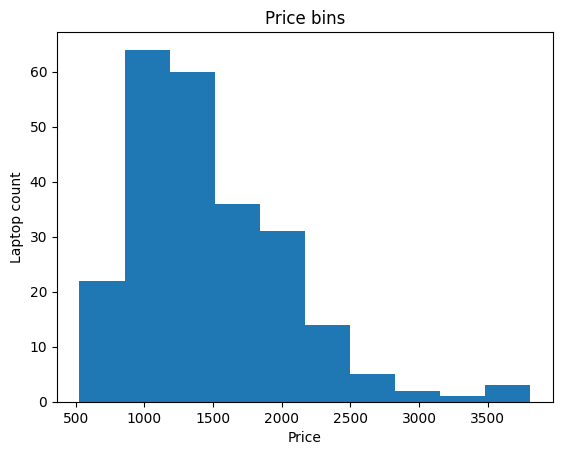

In [19]:
#plot the distribution of the attribute "price"
plt.pyplot.hist(df['Price'])

#set x and y labels and title
plt.pyplot.xlabel('Price')
plt.pyplot.ylabel('Laptop count')
plt.pyplot.title('Price bins')

In [21]:
#create a bin array
bins = np.linspace(df['Price'].min(), df['Price'].max(), 4)
#allocate group names
group_name = ['Low', 'Medium', 'High']
#group the price as low, medium or high
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_name, include_lowest=True)

Text(0.5, 1.0, 'Price bins')

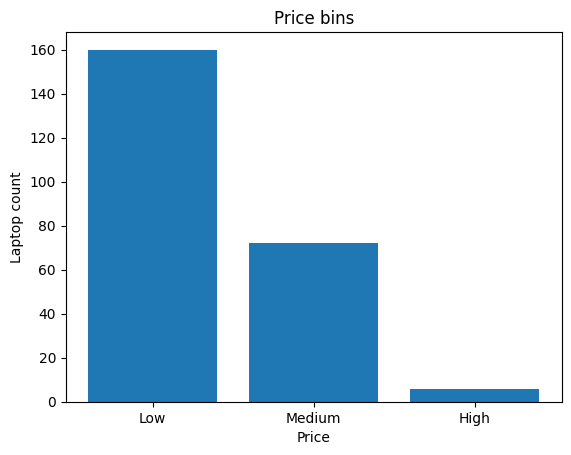

In [25]:
#plot the distribution of each bin
plt.pyplot.bar(group_name, df['Price-binned'].value_counts())

#set x and y labels and title
plt.pyplot.xlabel('Price')
plt.pyplot.ylabel('Laptop count')
plt.pyplot.title('Price bins')

##**Indicator variable**
Lets convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.

In [30]:
#get the indicator variable
ind_var_screen = pd.get_dummies(df['Screen'])
#rename the columns
ind_var_screen.rename(columns={'Full HD': 'Screen-Full_HD', 'IPS Panel': 'Screen-IPS_pane'}, inplace=True)
#merge the data frames 'df' and 'ind_var_screen'
df = pd.concat([df, ind_var_screen], axis=1)
#drop the original "Screen" column
df.drop('Screen', axis=1, inplace=True)

In [32]:
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inches,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_pane
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.520800,978,Low,False,True
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.841100,634,Low,True,False
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.841100,946,Low,True,False
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.684610,1244,Low,False,True
4,HP,4,2,1,7,15.6,0.620690,8,256,4.202955,837,Low,True,False


In [33]:
df.to_csv('clean_laptops.csv', index=False)